In [ ]:
# Import packages and functions
## If running this cell causes a 'not found' error
## Try uncommenting the line below and re-running the cell

#%pip install palmerpenguins
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree

from palmerpenguins import load_penguins

In [ ]:
# Load the penguins data from palmerpenguins module
penguins = load_penguins()

# Drop penguins with missing values
penguins = penguins.dropna()

# Calculate summary statistics using .describe()
penguins.describe(include='all')

In [ ]:
penguins.info()

In [ ]:
penguins.head()

In [ ]:
# Save output features as y
y = penguins[['species']]

# Save input features as x
X = penguins[['flipper_length_mm', 'bill_length_mm']]

# Initialize the model
classtreeModel = DecisionTreeClassifier(max_depth=5)

# Fit the model
classtreeModel = classtreeModel.fit(X, y)

In [ ]:
# Print tree as text
print(export_text(classtreeModel, feature_names=X.columns.to_list()))

In [ ]:
# Resize the plotting window
plt.figure(figsize=[12, 8])

# Values in brackets represent classes in alphabetical order
# [Adelie, Chinstrap, Gentoo]
p = tree.plot_tree(classtreeModel, feature_names=X.columns, filled=False, fontsize=10)

#### Measuring the performance of a multi-label classifier

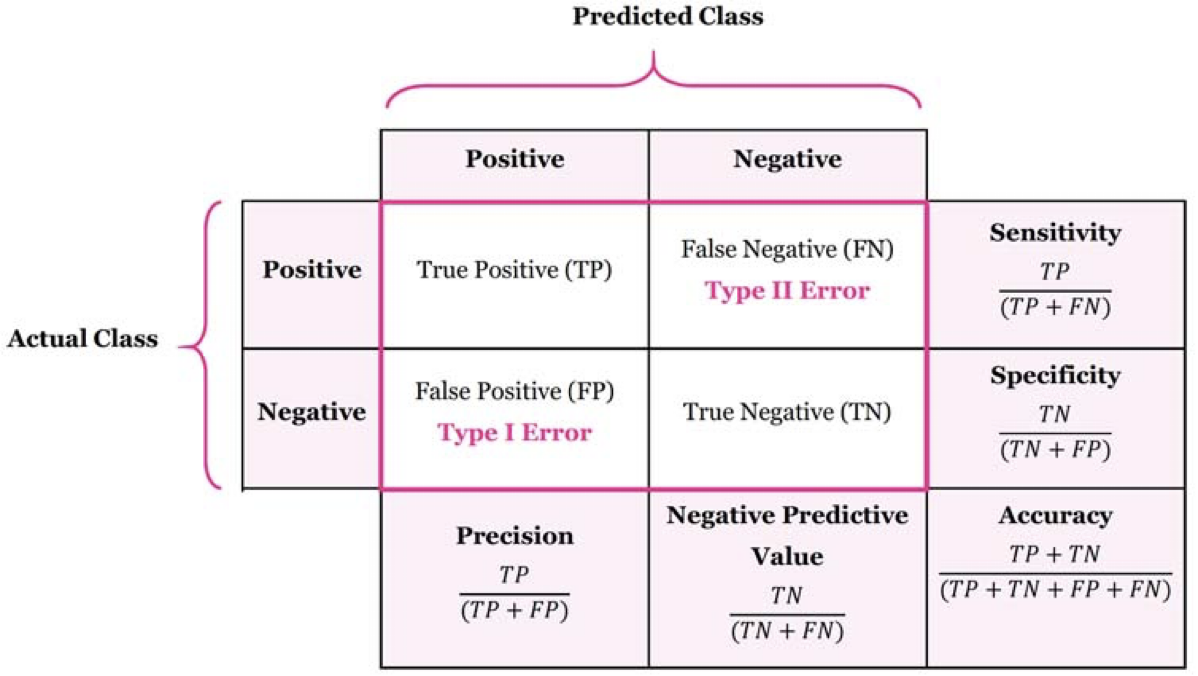

In [ ]:
# Calculate cross-entroy and error rate

print("Cross-entropy: ", metrics.log_loss(y, classtreeModel.predict_proba(X)))
print("Error rate: ", 1 - metrics.accuracy_score(y, classtreeModel.predict(X)))

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y, classtreeModel.predict(X))

# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y, classtreeModel.predict(X))

In [ ]:
[[TPa, Eba, Eca],
[Eab, TPb, Ecb],
[Eac, Ebc, TPc]]=cm
accuracy=(TPa+TPb+TPc)/sum(cm.flatten())
accuracy

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, classtreeModel.predict(X)))

In [ ]:
# Define a regression random forest model
rfModel = RandomForestClassifier(max_depth=5, max_features='sqrt', random_state=99)

# Fit the model
rfModel.fit(X, y.values.ravel())

In [ ]:
print("Cross-entropy: ", metrics.log_loss(y, rfModel.predict_proba(X)))
print("Error rate: ", 1 - metrics.accuracy_score(y, rfModel.predict(X)))

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y, rfModel.predict(X))

# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y, rfModel.predict(X))

In [ ]:
print(classification_report(y, rfModel.predict(X)))